## Titanic: Machine Learning from Disaster
This is a kaggle competition where we will predict the survival of a subset of titanic passenters (test set), given a set of passengers with known survival (train set). For each passenger there exist several features, including Name, Age, Sex, Ticket number, Ticket class, etc. We follow these steps:

1. Exploring the data
2. Cleanig and feature selection
3. Prediction models, cross-validation and prediction

This kernel led to a kaggle submission accuracy of __0.82296__ and top **4%**. For those who already have made submissions, the key points are summarized below:

- Even though the cabin feature has many missing data, it can be replaced by 0, 1. 0 when cabin is NaN and 1 otherwise. We will see that there is a correlation between CabinCode (0 or 1) and survival. 
- Ticket column is usefull; there is a correlation between survival chance and prefix of the Ticket feature. 
- One key to get an score above 0.80 seems to be proper use of Ticket or Family clustering. I grouped passengers based on their ticket numbers (there are multiple individuals with the same ticket numbers!)

### Import the libraries
As the first step all neccessary libraries will be imported; this list will be updated as we are going forward

In [1]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn import ensemble, model_selection
import seaborn as sns
import numpy as np
from collections import Counter

## 1. Import and explore the data
We import and explore the data; how many samples do we have, what are the attributes are, what are the missing data... 

In [2]:
trData = pd.read_csv('train.csv')
testData = pd.read_csv('test.csv')
data_list = [trData, testData]
trData.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Explore the data
We use describe() method to quickly get an overview of the features and the output ('Survived'). 

In [3]:
trData.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


From the training data (trData), the average survival data is ~0.384, so only 342 passengers out of 891 (see below) passengers survived. 

In [4]:
trData['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

### Graphs: Distribution of the features
Now we explore distribution of the features.

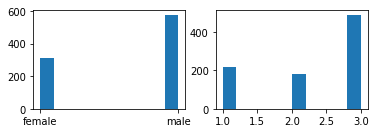

In [5]:
# Sex
plt.subplot(2, 2, 1)
plt.hist(trData['Sex'])

# Pclass 
plt.subplot(2, 2, 2)
plt.hist(trData['Pclass'])

plt.show()

# 2. Cleaning and feature engineering
After exploring the data, we start cleaning the data and at the same time do feature engineering by looking at the correlation of the features (including the new features that we may create) with survival. 

In [6]:
print("Total number of samples in train set is:", len(trData))
print("-"*45)
print("The number of null (NaN) values in each column of the train set is:")
print(trData.isnull().sum())
print("*"*70)
print("Total number of samples in test set is:", len(testData))
print("-"*45)
print("The number of null (NaN) values in each column of the train set is:")
print(testData.isnull().sum())

Total number of samples in train set is: 891
---------------------------------------------
The number of null (NaN) values in each column of the train set is:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
**********************************************************************
Total number of samples in test set is: 418
---------------------------------------------
The number of null (NaN) values in each column of the train set is:
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [7]:
for data in data_list:
    #data['Age'].fillna(trData['Age'].median(), inplace = True)
    data['Embarked'].fillna(trData['Embarked'].mode()[0], inplace = True)

In [8]:
print("Total number of samples in train set is:", len(trData))
print("-"*45)
print("The number of null (NaN) values in each column of the train set is:")
print(trData.isnull().sum())
print("*"*70)
print("Total number of samples in test set is:", len(testData))
print("-"*45)
print("The number of null (NaN) values in each column of the train set is:")
print(testData.isnull().sum())

Total number of samples in train set is: 891
---------------------------------------------
The number of null (NaN) values in each column of the train set is:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64
**********************************************************************
Total number of samples in test set is: 418
---------------------------------------------
The number of null (NaN) values in each column of the train set is:
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [9]:
combinedData = pd.concat(objs=[trData, testData], axis=0).reset_index(drop=True)

In [10]:
PclassVsFare = combinedData[['Pclass','Fare']].groupby(['Pclass'], as_index = False).mean()
PclassVsFare

,Pclass,Fare
0,1,87.508992
1,2,21.179196
2,3,13.302889


In [11]:
testData['Pclass'][testData['Fare'].isnull()] 

152    3
Name: Pclass, dtype: int64

In [12]:
# The passenger with missing class has a Pclass of 3 whose average Fare is 13.67 
testData['Fare'].fillna(PclassVsFare.loc[2,'Fare'], inplace = True);

In [13]:
for data in data_list:
    data['Title'] = data['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]
testData.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs


In [14]:
testData['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Dona        1
Ms          1
Dr          1
Name: Title, dtype: int64

In [15]:
trData['Title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Col               2
Major             2
Mme               1
Sir               1
Jonkheer          1
Capt              1
the Countess      1
Don               1
Lady              1
Ms                1
Name: Title, dtype: int64

In [16]:
for data in data_list:
    data['Title'] = data['Title'].replace(['Lady', 'Sir', 'the Countess'], 'Royal')
    data['Title'] = data['Title'].replace(['Ms', 'Mlle'], 'Miss')
    data['Title'] = data['Title'].replace('Mme', 'Mrs')
    data['Title'] = data['Title'].replace(['Lady', 'Capt', 'Col',
    'Don', 'Dr', 'Major', 'Rev', 'Jonkheer', 'Dona'], 'Rare')

In [17]:
trData['Title'].value_counts()

Mr        517
Miss      185
Mrs       126
Master     40
Rare       20
Royal       3
Name: Title, dtype: int64

In [18]:
testData['Title'].value_counts()

Mr        240
Miss       79
Mrs        72
Master     21
Rare        6
Name: Title, dtype: int64

In [19]:
for data in data_list:
    data['Nfamily'] = data['Parch'] + data['SibSp'] + 1

In [20]:
combinedData = pd.concat(objs=[trData, testData], axis=0).reset_index(drop=True)

In [21]:
combinedData.loc[combinedData['Ticket'] == 'A/5. 851']

,Age,Cabin,Embarked,Fare,Name,Nfamily,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title
153,40.5,NaN,S,14.5,"van Billiard, Mr. Austin Blyler",3,2,154,3,male,0,0.0,A/5. 851,Mr
1083,11.5,NaN,S,14.5,"van Billiard, Master. Walter John",3,1,1084,3,male,1,NaN,A/5. 851,Master
1235,NaN,NaN,S,14.5,"van Billiard, Master. James William",3,1,1236,3,male,1,NaN,A/5. 851,Master


In [22]:
combinedData['FamilyName'] = combinedData.Name.str.extract('(\w+),', expand = False)
trData['FamilyName'] = trData.Name.str.extract('(\w+),', expand = False)
testData['FamilyName'] = testData.Name.str.extract('(\w+),', expand = False)

In [23]:
combinedData['FamilyName'].value_counts()

Andersson     11
Sage          11
Goodwin        8
Asplund        8
Davies         7
Skoog          6
Panula         6
Ford           6
Johnson        6
Rice           6
Brown          6
Smith          6
Carter         6
Fortune        6
Ryerson        5
Kelly          5
Thomas         5
Lefebre        5
Palsson        5
Williams       5
Johnston       4
Harris         4
Hart           4
Herman         4
Dean           4
Boulos         4
Hocking        4
Gustafsson     4
Laroche        4
Hansen         4
              ..
Walcroft       1
Leitch         1
Nieminen       1
Hodges         1
Widegren       1
Ridsdale       1
Finoli         1
Peduzzi        1
Driscoll       1
Sharp          1
McMahon        1
McGovern       1
Bengtsson      1
Weir           1
Corey          1
Mayne          1
Lovell         1
Maybery        1
Stankovic      1
Crafton        1
Dulles         1
Vestrom        1
Dahlberg       1
Stanton        1
Aubart         1
Lahoud         1
Sadlier        1
Peltomaki     

In [24]:
ticket_counts = combinedData['Ticket'].value_counts()
ticket_unique = combinedData['Ticket'].value_counts().index

In [25]:
temp_surv_array = []
for i in range(0, len(ticket_unique)):
    expression1 = (((testData['Ticket'] == ticket_unique[i]).sum() > 0) & (((trData['Ticket'] == ticket_unique[i]).sum()) > 1))
    expression2 = (((testData['Ticket'] == ticket_unique[i]).sum() > 0) & (((trData['Ticket'] == ticket_unique[i]).sum()) == 1))
    if expression1:
        if trData.loc[trData['Ticket'] == ticket_unique[i], 'Survived'].mean() > 0.75:
            survival_rate_i =  1
        elif 0.5 <= trData.loc[trData['Ticket'] == ticket_unique[i], 'Survived'].mean() <=0.75:
            survival_rate_i = 0.5
        elif 0.25 <= trData.loc[trData['Ticket'] == ticket_unique[i], 'Survived'].mean() < 0.5:
            survival_rate_i = 0.25
        else:
            survival_rate_i = 0
    elif expression2:
        survival_rate_i =  0.5 * trData.loc[trData['Ticket'] == ticket_unique[i], 'Survived'].mean()
    else:
        survival_rate_i = -1
    temp_surv_array.append(survival_rate_i)

In [26]:
myDict = dict(zip(ticket_unique, temp_surv_array))

In [27]:
for data in data_list:
    data['TicketSurvivalRate'] = data['Ticket'].apply(lambda x: myDict[x])
testData['TicketSurvivalRate'].fillna(0, inplace = True);

In [28]:
labelName = 'FamilyName'
family_counts = combinedData[labelName].value_counts()
family_unique = combinedData[labelName].value_counts().index
temp_surv_array = []
for i in range(0, len(family_unique)):
    expression1 = (((testData[labelName] == family_unique[i]).sum() > 0) & (((trData[labelName] == family_unique[i]).sum()) > 1))
    expression2 = (((testData[labelName] == family_unique[i]).sum() > 0) & (((trData[labelName] == family_unique[i]).sum()) == 1))
    if expression1:
        if trData.loc[trData[labelName] == family_unique[i], 'Survived'].mean() > 0.75:
            survival_rate_i =  1
        elif 0.5 <= trData.loc[trData[labelName] == family_unique[i], 'Survived'].mean() <=0.75:
            survival_rate_i = 0.5
        elif 0.25 <= trData.loc[trData[labelName] == family_unique[i], 'Survived'].mean() < 0.5:
            survival_rate_i = 0.25
        else:
            survival_rate_i = 0
    elif expression2:
        survival_rate_i =  0.5 * trData.loc[trData[labelName] == family_unique[i], 'Survived'].mean()
    else:
        survival_rate_i = -1
    temp_surv_array.append(survival_rate_i)
myDict = dict(zip(family_unique, temp_surv_array))
for data in data_list:
    data['FamilySurvivalRate'] = data[labelName].apply(lambda x: myDict[x])

In [29]:
trData.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Nfamily,FamilyName,TicketSurvivalRate,FamilySurvivalRate
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,2,Braund,-1.0,-1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2,Cumings,0.5,0.5
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1,Heikkinen,-1.0,-1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2,Futrelle,-1.0,-1.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,1,Allen,-1.0,-1.0


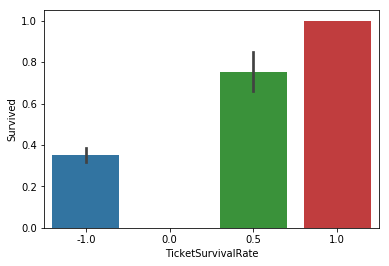

In [30]:
sns.barplot(x = 'TicketSurvivalRate', y = 'Survived', data = trData)
plt.show()

In [31]:
trData['TicketSurvivalRate'].value_counts()

-1.0    684
 0.5     85
 0.0     84
 1.0     38
Name: TicketSurvivalRate, dtype: int64

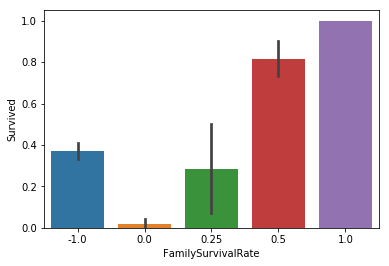

In [32]:
sns.barplot(x = 'FamilySurvivalRate', y = 'Survived', data = trData)
plt.show()

In [33]:
combinedData.loc[combinedData['FamilyName'] == 'Asplund'][['Name', 'Nfamily', 'Survived','Ticket']]

,Name,Nfamily,Survived,Ticket
25,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",7,1.0,347077
182,"Asplund, Master. Clarence Gustaf Hugo",7,0.0,347077
233,"Asplund, Miss. Lillian Gertrud",7,1.0,347077
261,"Asplund, Master. Edvin Rojj Felix",7,1.0,347077
1045,"Asplund, Master. Filip Oscar",7,NaN,347077
1065,"Asplund, Mr. Carl Oscar Vilhelm Gustafsson",7,NaN,347077
1117,"Asplund, Mr. Johan Charles",1,NaN,350054
1270,"Asplund, Master. Carl Edgar",7,NaN,347077


In [34]:
title_vs_age = combinedData[['Title', 'Age']].groupby(['Title'], as_index = False).mean()
title_vs_age

,Title,Age
0,Master,5.482642
1,Miss,21.824366
2,Mr,32.252151
3,Mrs,36.918129
4,Rare,45.400000
5,Royal,43.333333


In [35]:
title_vs_age.loc[title_vs_age['Title'] == 'Master', 'Age'][0]

5.4826415094339627

In [36]:
# temp_array = []
# for data in data_list:
#     for i in range(len(data)):
#         if np.isnan(data['Age'][i]):
#             colVec = (data['Title'] == data['Title'][i]) & (data['Embarked'] == data['Embarked'][i]) & (data['Pclass'] == data['Pclass'][i]) 
#             temp_array.append(data.loc[colVec, 'Age'].mean())
#         else:
#             temp_array.append(data['Age'][i])
#     data['Age'] = temp_array
#     temp_array = []

In [37]:
for i in range(0, len(title_vs_age)):
    title_temp = title_vs_age.loc[i]['Title']
    trData.loc[trData['Age'].isnull() & (trData['Title'] == title_temp), 'Age'] = title_vs_age.loc[title_vs_age['Title'] == title_temp, 'Age'][i]
    testData.loc[testData['Age'].isnull() & (testData['Title'] == title_temp), 'Age'] = title_vs_age.loc[title_vs_age['Title'] == title_temp, 'Age'][i]

### Cabin code; missing cabin code is converted to 0, and existing ones converted to 1

In [38]:
for data in data_list:
    data['CabinCode'] = (data['Cabin'].notnull()) * 1

## Transfer categorial values to discrete values

In [39]:
trData.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Nfamily,FamilyName,TicketSurvivalRate,FamilySurvivalRate,CabinCode
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,2,Braund,-1.0,-1.0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2,Cumings,0.5,0.5,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1,Heikkinen,-1.0,-1.0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2,Futrelle,-1.0,-1.0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,1,Allen,-1.0,-1.0,0


In [40]:
trData['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Rare', 'Royal'], dtype=object)

### Define the age bins and fare bins

In [41]:
age_bins = [0, 12, 19, 25, 35, 60, np.inf]
age_labels = ['Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
trData['AgeGroup'] = pd.cut(trData["Age"], age_bins, labels = age_labels)
testData['AgeGroup'] = pd.cut(testData["Age"], age_bins, labels = age_labels)

In [42]:
trData['AgeGroup'].value_counts()

Young Adult    315
Adult          213
Student        173
Teenager        95
Child           73
Senior          22
Name: AgeGroup, dtype: int64

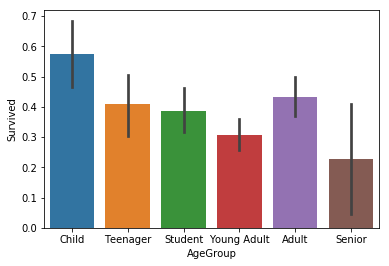

In [43]:
sns.barplot(x = 'AgeGroup', y = 'Survived', data = trData)
plt.show()

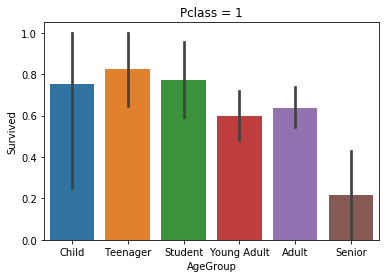

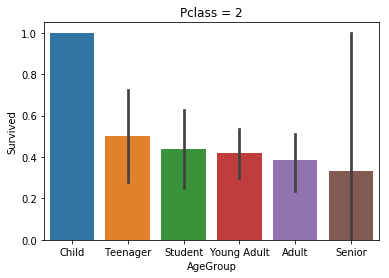

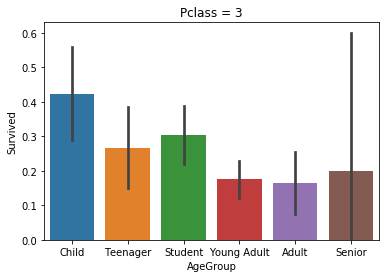

In [44]:
g = sns.barplot(x = 'AgeGroup', y = 'Survived', data = trData.loc[trData['Pclass'] == 1])
g.set_title("Pclass = 1")
plt.show()
g = sns.barplot(x = 'AgeGroup', y = 'Survived', data = trData.loc[trData['Pclass'] == 2])
g.set_title("Pclass = 2")
plt.show()
g = sns.barplot(x = 'AgeGroup', y = 'Survived', data = trData.loc[trData['Pclass'] == 3])
g.set_title("Pclass = 3")
plt.show()

In [45]:
trData['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [46]:
pd.qcut(trData['Fare'], 3).value_counts()

(-0.001, 8.662]    308
(26.0, 512.329]    295
(8.662, 26.0]      288
Name: Fare, dtype: int64

In [47]:
combinedData[['Pclass','Fare']].groupby(['Pclass'], as_index = False).median()

,Pclass,Fare
0,1,60.0000
1,2,15.0458
2,3,8.0500


In [48]:
trData['Fare'].describe()
fare_bins = [-0.1,  7.5, 15, 40, 70, np.inf]
fare_labels = ['Cheap', 'BelowAverage', 'Average', 'AboveAverage','Expensive']
trData['FareBin'] = pd.cut(trData['Fare'], fare_bins, labels = fare_labels)
testData['FareBin'] = pd.cut(testData['Fare'], fare_bins, labels = fare_labels)

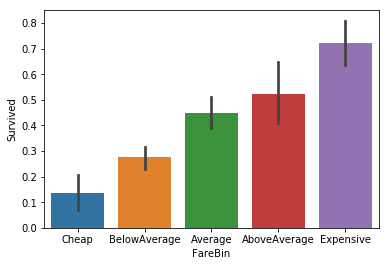

In [49]:
sns.barplot(x = 'FareBin', y = 'Survived', data = trData)
plt.show()

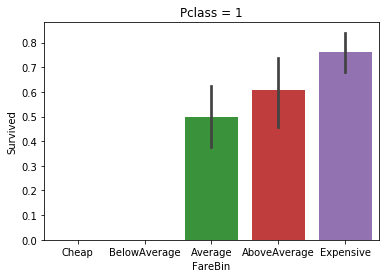

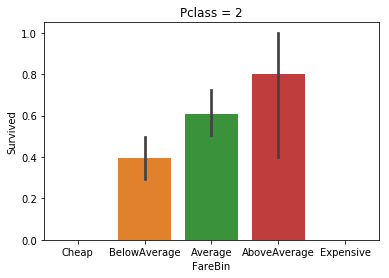

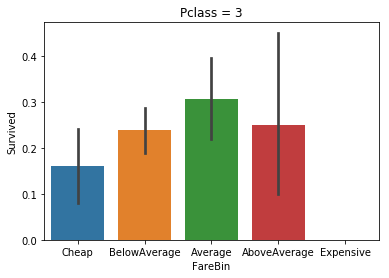

In [50]:
# Check variation of survival rate vs agegroup within the three Pclasses (this helps picking the right age_bins)
g = sns.barplot(x = 'FareBin', y = 'Survived', data = trData.loc[trData['Pclass'] == 1])
g.set_title("Pclass = 1")
plt.show()
g = sns.barplot(x = 'FareBin', y = 'Survived', data = trData.loc[trData['Pclass'] == 2])
g.set_title("Pclass = 2")
plt.show()
g = sns.barplot(x = 'FareBin', y = 'Survived', data = trData.loc[trData['Pclass'] == 3])
g.set_title("Pclass = 3")
plt.show()

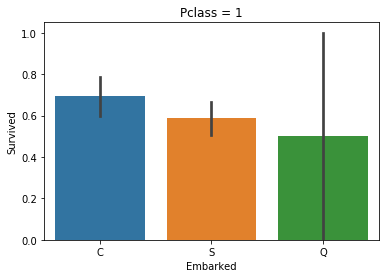

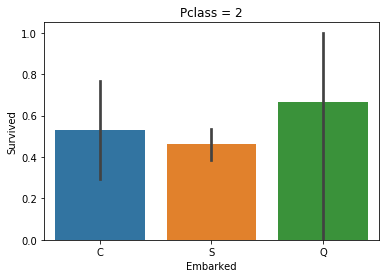

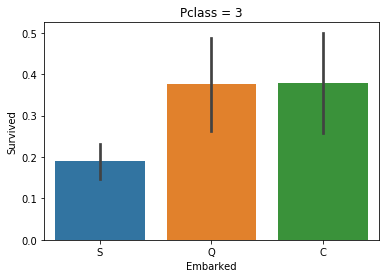

In [51]:
g = sns.barplot(x = 'Embarked', y = 'Survived', data = trData.loc[trData['Pclass'] == 1])
g.set_title("Pclass = 1")
plt.show()
g = sns.barplot(x = 'Embarked', y = 'Survived', data = trData.loc[trData['Pclass'] == 2])
g.set_title("Pclass = 2")
plt.show()
g = sns.barplot(x = 'Embarked', y = 'Survived', data = trData.loc[trData['Pclass'] == 3])
g.set_title("Pclass = 3")
plt.show()

In [52]:
trData['FareBin'].value_counts()

BelowAverage    371
Average         257
Expensive       105
Cheap            87
AboveAverage     71
Name: FareBin, dtype: int64

In [53]:
TicketVec = []
for data in data_list:
    for i in list(data.Ticket):
        if not i.isdigit() :
            TicketVec.append(i.replace(".","").replace("/","").strip().split(' ')[0]) #Take prefix
        else:
            TicketVec.append("X")
    data["TicketLetter"] = TicketVec
    data["TicketLetter"].head()
    TicketVec = []

In [54]:
trData['TicketLetter'].head()

0        A5
1        PC
2    STONO2
3         X
4         X
Name: TicketLetter, dtype: object

In [55]:
for data in data_list:
    data['TicketPrefix'] = data['TicketLetter'].apply(lambda x: 'Rare' if data['TicketLetter'].value_counts()[x] < 6 else x)

In [56]:
testData['TicketPrefix'].value_counts()

X          296
Rare        40
PC          32
CA          27
SOTONOQ      9
A5           7
SCPARIS      7
Name: TicketPrefix, dtype: int64

In [57]:
trData['TicketPrefix'].value_counts()

X          661
PC          60
Rare        45
CA          41
A5          21
SOTONOQ     15
STONO       12
WC          10
A4           7
SCPARIS      7
SOC          6
STONO2       6
Name: TicketPrefix, dtype: int64

In [58]:
testData['Ticket'].value_counts()

PC 17608              5
CA. 2343              4
113503                4
16966                 3
220845                3
C.A. 31029            3
SOTON/O.Q. 3101315    3
347077                3
PC 17483              3
347072                2
PC 17756              2
CA 2144               2
S.O.C. 14879          2
112378                2
113781                2
C 4001                2
A/5. 851              2
13236                 2
36928                 2
11778                 2
24065                 2
13508                 2
CA 31352              2
350405                2
13695                 2
28220                 2
2650                  2
2660                  2
12749                 2
19950                 2
                     ..
347090                1
PC 17607              1
347471                1
28133                 1
220844                1
3410                  1
392095                1
2625                  1
680                   1
113038                1
SC/Paris 2123   

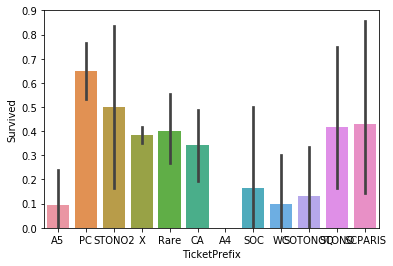

In [59]:
sns.barplot(x = 'TicketPrefix', y = 'Survived', data = trData)
plt.show()

In [60]:
label = LabelEncoder()
for data in data_list:
    #data['FareBinCode'] = label.fit_transform(data['FareBin'])
    #data['AgeBinCode'] = label.fit_transform(data['AgeBin']) 
    #data['TicketCode'] = label.fit_transform(data['TicketPrefix'])
    data['TicketCode'] = data['TicketPrefix'].replace(['X','Rare', 'PC', 'CA', 'A5', 'SOTONOQ', 'STONO', 'WC', 'SCPARIS', 'A4', 'SOC', 'STONO2']
                                                      , [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
    data['SexCode'] = data['Sex'].replace(['female', 'male'], [0, 1])
    data['EmbarkedCode'] = data['Embarked'].replace(['S', 'Q', 'C'], [0, 1, 2])
    data['TitleCode'] = data['Title'].replace(['Mr', 'Mrs', 'Miss', 'Master','Royal', 'Rare'], [0, 1, 2, 3, 4, 5])
    data['IsAlone'] = 1
    data.loc[data['Nfamily'] > 1, 'IsAlone'] = 0
    data['AgeGroup'] = data['AgeGroup'].replace(age_labels,[0, 1, 2, 3, 4, 5])
    data['FareBin'] = data['FareBin'].replace(fare_labels, [0, 1, 2, 3, 4])

# Statistical Analysis and feature engineering

In [61]:
trData[['Nfamily', 'Survived']].groupby(['Nfamily'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Nfamily,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [62]:
trData[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [63]:
trData[['Sex','Survived']].groupby(['Sex'], as_index = False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [64]:
trData[['SibSp','Survived']].groupby(['SibSp'], as_index = False).mean()

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [65]:
trData['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [66]:
trData[['Pclass','Fare','Survived']].groupby(['Pclass'], as_index = False).mean()

,Pclass,Fare,Survived
0,1,84.154687,0.629630
1,2,20.662183,0.472826
2,3,13.675550,0.242363


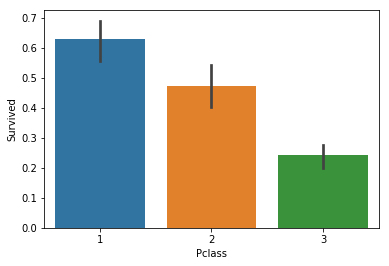

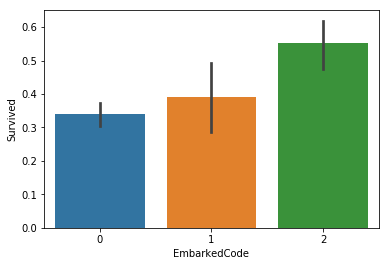

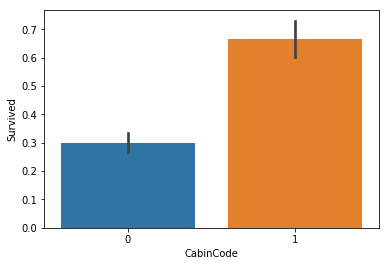

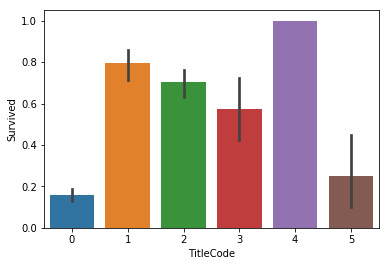

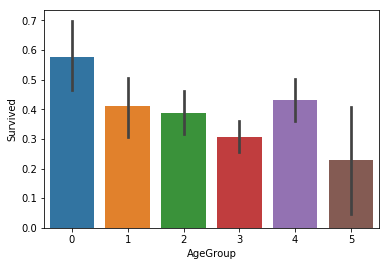

In [67]:
sns.barplot(x="Pclass", y="Survived", data=trData)
plt.show()
sns.barplot(x="EmbarkedCode", y="Survived", data=trData)
plt.show()
sns.barplot(x = "CabinCode", y = "Survived", data = trData)
plt.show()
sns.barplot(x = "TitleCode", y = "Survived", data = trData)
plt.show()
sns.barplot(x = "AgeGroup", y = "Survived", data = trData)
plt.show()

In [68]:
pd.crosstab(trData['Sex'], trData['Survived'])

Survived,0,1
Sex,,
female,81,233
male,468,109


In [69]:
trData[['TitleCode','Survived']].groupby(['TitleCode'], as_index = False).mean()

,TitleCode,Survived
0,0,0.156673
1,1,0.793651
2,2,0.702703
3,3,0.575000
4,4,1.000000
5,5,0.250000


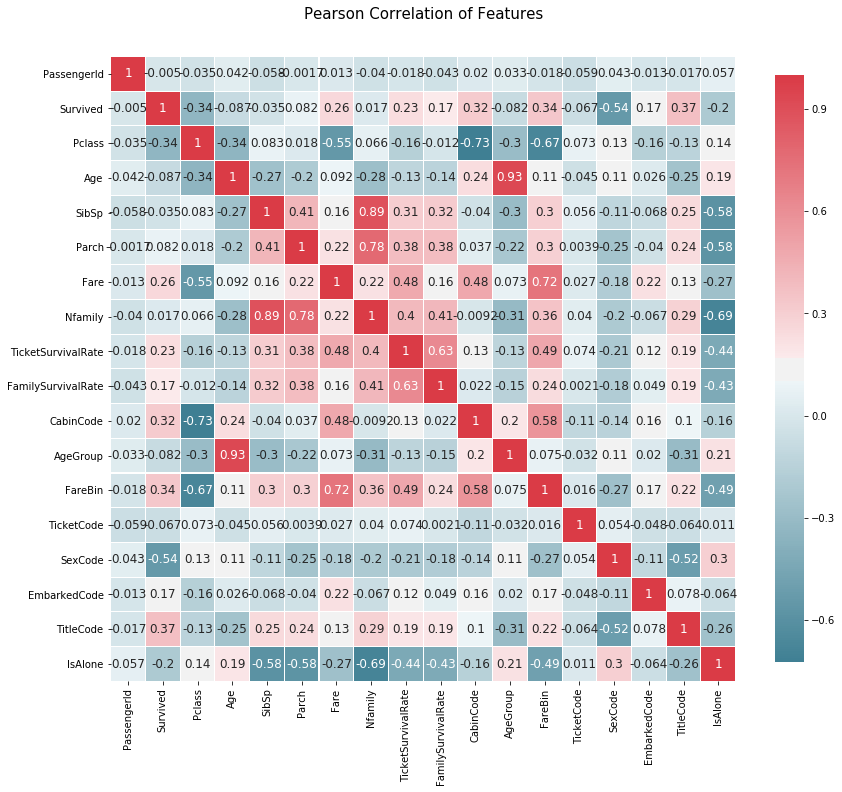

In [70]:
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

correlation_heatmap(trData)
plt.show()

# Classification models, cross-validation, and parameter tuning

In [71]:
selectedFeatures = ['Pclass', 'SexCode', 'AgeGroup', 'TitleCode', 'Nfamily', 'IsAlone', 'EmbarkedCode', 'FareBin'
                    ,'CabinCode', 'TicketCode', 'TicketSurvivalRate']; # IsAlone is a redundant feature and I think it should be removed, however, with that I got a better submission accuracy on Kaggle
X = trData[selectedFeatures]
y = trData['Survived']

In [72]:
X.head()

,Pclass,SexCode,AgeGroup,TitleCode,Nfamily,IsAlone,EmbarkedCode,FareBin,CabinCode,TicketCode,TicketSurvivalRate
0,3,1,2,0,2,0,0,0,0,4,-1.0
1,1,0,4,1,2,0,2,4,1,2,0.5
2,3,0,3,2,1,1,0,1,0,11,-1.0
3,1,0,3,1,2,0,0,3,1,0,-1.0
4,3,1,3,0,1,1,0,1,0,0,-1.0


## Cross-validation
First a cross validation; we split the training set (trData) to a test size of 20 percent and train size of 0.8. We do a cross validation on 0.8 set. 

In [73]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.2, train_size = 0.8, random_state=1)

## From the above results we try a voting 
### Comparing different possible voting lists
We try different voting lists, and pick the one with the highest accuracy. Once we decide about the best voting list, we run the gridsearchCV this time for the whole data set

In [74]:
# voting_list = [('grBoost', clf_list[2]), ('randforest', clf_list[3]), ('extree', clf_list[4]), ('knn', clf_list[5])]
# # voting_list = [('randforest', clf_list[3]), ('extree', clf_list[4]), ('grBoost', clf_list[2])]
# voting_list = [('a', clf_list[2]), ('c', clf_list[3]), ('d', clf_list[3])]
# votingC = ensemble.VotingClassifier(estimators=voting_list, voting='soft', n_jobs=4)
# votingC = votingC.fit(Xtrain, ytrain)
# arpredict = votingC.predict(Xtest)
# print(metrics.accuracy_score(ytest, arpredict))
# best_voting_list = votingC

The above number is the approximated accuracy that we should when testing the real data. However, of course we should use all the available results for fitting so we replace Xtrain and ytrain with X and y

In [75]:
cv_split = model_selection.ShuffleSplit(n_splits = 10, test_size = .4, train_size = .6, random_state = 0) 
grid_bool = [True, False]
C_param_range = [0.001,0.01,0.1,0.2,1,10,11,12,13,20, 30, 40]
grid_ratio_list = [.1, .25, .5, .75, 1.0]
grid_n_neighbors = range(1, 20)
grid_n_estimator = [10, 50, 100, 300]
grid_learn = [.01, .03, .05, .1, .25]
grid_max_depth = [2, 4, 6, 8, 10, None]
grid_min_samples = [5, 10, .03, .05, .10]
grid_criterion = ['gini', 'entropy']
grid_bool = [True, False]
grid_seed = [0]

clf_list = [LogisticRegression(), SVC(), ensemble.GradientBoostingClassifier(), ensemble.RandomForestClassifier(), 
            ensemble.ExtraTreesClassifier(), KNeighborsClassifier()]
grid_param_list = [[{
            #LogisticRegressionCV - http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegressionCV.html#sklearn.linear_model.LogisticRegressionCV
            'fit_intercept': grid_bool, #default: True
            #'penalty': ['l1','l2'],
            'C': C_param_range,
            #'solver': ['newton-cg','lbfgs','liblinear']
             }],
             [{
            'C': C_param_range,
             'gamma': grid_ratio_list
             }],
             [{
              'max_depth': grid_max_depth   
             }], 
             [{
             'n_estimators': grid_n_estimator, #default=10
             'criterion': grid_criterion, #default=”gini”
             'max_depth': grid_max_depth, #default=None
             #'oob_score': [True],
             'random_state': grid_seed
             }],
             [{
             'n_estimators': grid_n_estimator, #default=10
             'criterion': grid_criterion, #default=”gini”
             'max_depth': grid_max_depth, #default=None
             #'oob_score': [True],
             'random_state': grid_seed
             }],
             [{
              'n_neighbors': grid_n_neighbors
             }]
             ]
best_scores_list = []
for clf, param in zip (clf_list, grid_param_list):
    best_search = model_selection.GridSearchCV(estimator = clf, param_grid = param, cv = cv_split, scoring = 'roc_auc'
                                              , n_jobs = 4)
    best_search.fit(X, y) # Note X, y NOT Xtrain, ytrain
    best_param = best_search.best_params_
    best_score = best_search.best_score_
    print('The best parameter for {} is {} with a runtime of seconds with a score of {}'.format(clf.__class__.__name__, best_param, best_score))
    clf.set_params(**best_param) 
    best_scores_list.append(best_score)
print("--"*45, "\nMax cross-validation score is:", max(best_scores_list))
print("--"*45, "\nAverage cross-validation score is:", sum(sorted(best_scores_list, reverse=True)[0:3]) / 3)

The best parameter for LogisticRegression is {'C': 30, 'fit_intercept': True} with a runtime of seconds with a score of 0.8631937591403341
The best parameter for SVC is {'C': 10, 'gamma': 0.1} with a runtime of seconds with a score of 0.8627437888965359
The best parameter for GradientBoostingClassifier is {'max_depth': 2} with a runtime of seconds with a score of 0.9021084462730284
The best parameter for RandomForestClassifier is {'criterion': 'entropy', 'max_depth': 8, 'n_estimators': 300, 'random_state': 0} with a runtime of seconds with a score of 0.8997147793624913
The best parameter for ExtraTreesClassifier is {'criterion': 'entropy', 'max_depth': 8, 'n_estimators': 300, 'random_state': 0} with a runtime of seconds with a score of 0.8907523300028961
The best parameter for KNeighborsClassifier is {'n_neighbors': 7} with a runtime of seconds with a score of 0.8498135884717581
------------------------------------------------------------------------------------------ 
Max cross-valida

In [76]:
best_voting_list = [('a', clf_list[2]), ('c', clf_list[3]), ('d', clf_list[4])]
# best_voting_list = [('a', clf_list[2])]
votingC = ensemble.VotingClassifier(estimators=best_voting_list, voting='soft', n_jobs=4)
votingC = votingC.fit(X, y) # Note we fit the Whole X, y
arpredict = votingC.predict(Xtest)
print(metrics.accuracy_score(ytest, arpredict))

0.865921787709


In [77]:
testDataTemp = testData[selectedFeatures]
arPredict = votingC.predict(testDataTemp)

In [78]:
testDataTemp.head()

,Pclass,SexCode,AgeGroup,TitleCode,Nfamily,IsAlone,EmbarkedCode,FareBin,CabinCode,TicketCode,TicketSurvivalRate
0,3,1,3,0,1,1,1,1,0,0,-1.0
1,3,0,4,1,2,0,0,0,0,0,-1.0
2,2,1,5,0,1,1,1,1,0,0,-1.0
3,3,1,3,0,1,1,0,1,0,0,-1.0
4,3,0,2,1,3,0,0,1,0,0,0.5


In [79]:
yPredict = pd.DataFrame({'PassengerId':testData['PassengerId'], 'Survived': arPredict})
yPredict.to_csv('../predictions.csv', index = False)

In [80]:
X.head()

,Pclass,SexCode,AgeGroup,TitleCode,Nfamily,IsAlone,EmbarkedCode,FareBin,CabinCode,TicketCode,TicketSurvivalRate
0,3,1,2,0,2,0,0,0,0,4,-1.0
1,1,0,4,1,2,0,2,4,1,2,0.5
2,3,0,3,2,1,1,0,1,0,11,-1.0
3,1,0,3,1,2,0,0,3,1,0,-1.0
4,3,1,3,0,1,1,0,1,0,0,-1.0


In [81]:
testDataTemp.head()

,Pclass,SexCode,AgeGroup,TitleCode,Nfamily,IsAlone,EmbarkedCode,FareBin,CabinCode,TicketCode,TicketSurvivalRate
0,3,1,3,0,1,1,1,1,0,0,-1.0
1,3,0,4,1,2,0,0,0,0,0,-1.0
2,2,1,5,0,1,1,1,1,0,0,-1.0
3,3,1,3,0,1,1,0,1,0,0,-1.0
4,3,0,2,1,3,0,0,1,0,0,0.5


In [82]:
now = pd.read_csv('../predictions.csv')
best = pd.read_csv('../predictions_score82296.csv')
print(len(testData.loc[now['Survived'] != best['Survived']]))
testData.loc[now['Survived'] != best['Survived'], ['Ticket', 'Nfamily', 'TicketSurvivalRate']]

0


,Ticket,Nfamily,TicketSurvivalRate


In [83]:
trData.loc[trData['Ticket'] == '110813']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,CabinCode,AgeGroup,FareBin,TicketLetter,TicketPrefix,TicketCode,SexCode,EmbarkedCode,TitleCode,IsAlone
366,367,1,1,"Warren, Mrs. Frank Manley (Anna Sophia Atkinson)",female,60.0,1,0,110813,75.25,...,1,4,4,X,X,0,0,2,1,0


In [84]:
testData.loc[testData['Ticket'] == '110813']

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,CabinCode,AgeGroup,FareBin,TicketLetter,TicketPrefix,TicketCode,SexCode,EmbarkedCode,TitleCode,IsAlone
236,1128,1,"Warren, Mr. Frank Manley",male,64.0,1,0,110813,75.25,D37,...,1,5,4,X,X,0,1,2,0,0


In [85]:
yPredict.loc[now['Survived'] != best['Survived']]

,PassengerId,Survived
